# Sub-question for Paticipant 7

Firstly, we import all the packages and create a copied dataframe of our dataset. We have a look at the first 5 lines of the dataframe.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2 
import scipy.stats as stats
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

raw_df = pd.read_csv("../../../datasets/Participant-07.csv")
df = raw_df.copy()
new_df_date = df["Start"].str.split(" ",n = 1,expand = True)
df["Date"] = new_df_date[0]
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df['Date'].dt.day_name()
df = df.drop(columns = ["Start","Finish"]) #https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df = df.rename(columns = {"Steps (count)":"Steps"})

df.head()

,Steps,Date,Weekday
0,32.0,2022-01-01,Saturday
1,0.0,2022-01-01,Saturday
2,0.0,2022-01-01,Saturday
3,0.0,2022-01-01,Saturday
4,0.0,2022-01-01,Saturday


The following code blocks used to get some useful statistics from the dataset. We will use them in our hypothesis testing.

In [4]:
# convert dataframe columns into python lists.
df.Date = df.Date.dt.strftime('%Y-%m-%d')
df_steps = df.Steps.values.tolist()
df_dates = df.Date.values.tolist()
df_Weekday = df.Weekday.values.tolist()

df_list = [df_steps,df_dates,df_Weekday]
list_df = pd.DataFrame(df_list).transpose()
list_df.columns = ['Steps','Date','Weekday']

In [5]:
# Creating the step matrix.
date = ""
step = 0
weekday = ""
first = True
rows = []
for i in range(len(df_dates)):
    if first:
        first = False
        date = df_dates[0]
        step = df_steps[0]
        weekday = df_Weekday[0]
    if date != df_dates[i]:
        rows.append([int(step),date,weekday])
        date = df_dates[i]
        step = df_steps[i]
        weekday = df_Weekday[i]
    else:
        step += df_steps[i]


In [6]:
# Creating the matrix for chi-squared testing
Mon_5k = 0
Tue_5k = 0
Wed_5k = 0
Thu_5k = 0
Fri_5k = 0
Sat_5k = 0
Sun_5k = 0
Mon_10k = 0
Tue_10k = 0
Wed_10k = 0
Thu_10k = 0
Fri_10k = 0
Sat_10k = 0
Sun_10k = 0
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0
mon_small = 0
mon_medium = 0
mon_large = 0
tue_small = 0
tue_medium = 0
tue_large = 0
wed_small = 0
wed_medium = 0
wed_large = 0
thu_small = 0
thu_medium = 0
thu_large = 0
fri_small = 0
fri_medium = 0
fri_large = 0
sat_small = 0
sat_medium = 0
sat_large = 0
sun_small = 0
sun_medium = 0
sun_large = 0

mon_inactive = 0
tue_inactive = 0
wed_inactive = 0
thu_inactive = 0
fri_inactive = 0
sat_inactive = 0
sun_inactive = 0


for i in rows:
    day_step = i[0]
    day_weekday = i[2]
    if (5000<day_step<10000):
        if day_weekday == 'Monday':
            Mon_5k += 1
            mon += 1
            mon_medium += 1
        if day_weekday == 'Tuesday':
            Tue_5k += 1
            tue += 1
            tue_medium += 1
        if day_weekday == 'Wednesday':
            Wed_5k += 1
            wed += 1
            wed_medium += 1
        if day_weekday == 'Thursday':
            Thu_5k += 1
            thu += 1
            thu_medium += 1
        if day_weekday == 'Friday':
            Fri_5k += 1
            fri += 1
            fri_medium += 1
        if day_weekday == 'Saturday':
            Sat_5k += 1
            sat += 1
            sat_medium += 1
        if day_weekday == 'Sunday':
            Sun_5k += 1
            sun += 1
            sun_medium += 1
    if (day_step>10000):
        if day_weekday == 'Monday':
            Mon_10k += 1
            mon += 2
            mon_large += 1
        if day_weekday == 'Tuesday':
            Tue_10k += 1
            tue += 2
            tue_large += 1
        if day_weekday == 'Wednesday':
            Wed_10k += 1
            wed += 2
            wed_large += 1
        if day_weekday == 'Thursday':
            Thu_10k += 1
            thu += 2
            thu_large += 1
        if day_weekday == 'Friday':
            Fri_10k += 1
            fri += 2
            fri_large += 1
        if day_weekday == 'Saturday':
            Sat_10k += 1
            sat += 2
            sat_large+= 1
        if day_weekday == 'Sunday':
            Sun_10k += 1
            sun += 2
            sun_large += 1
    if (day_step < 5000):
        if day_weekday == 'Monday':
            mon_small += 1
        if day_weekday == 'Tuesday':
            tue_small += 1
        if day_weekday == 'Wednesday':
            wed_small += 1
        if day_weekday == 'Thursday':
            thu_small += 1
        if day_weekday == 'Friday':
            fri_small += 1
        if day_weekday == 'Saturday':
            sat_small += 1
        if day_weekday == 'Sunday':
            sun_small += 1
    if (day_step < 3000):
        if day_weekday == 'Monday':
            mon_inactive += 1
        if day_weekday == 'Tuesday':
            tue_inactive += 1
        if day_weekday == 'Wednesday':
            wed_inactive += 1
        if day_weekday == 'Thursday':
            thu_inactive += 1
        if day_weekday == 'Friday':
            fri_inactive += 1
        if day_weekday == 'Saturday':
            sat_inactive += 1
        if day_weekday == 'Sunday':
            sun_inactive += 1
print(mon_inactive)
ls_score = [mon,tue,wed,thu,fri,sat,sun]
ls_score_5k = [Mon_5k,Tue_5k,Wed_5k,Thu_5k,Fri_5k,Sat_5k,Sun_5k]
ls_score_10k = [Mon_10k,Tue_10k,Wed_10k,Thu_10k,Fri_10k,Sat_10k,Sun_10k]
mon_ls = ["Mon",mon_small,mon_medium,mon_large]
tue_ls = ["Tue",tue_small,tue_medium,tue_large]
wed_ls = ["Wed",wed_small,wed_medium,wed_large]
thu_ls = ["Thu",thu_small,thu_medium,thu_large]
fri_ls = ["Fri",fri_small,fri_medium,fri_large]
sat_ls = ["Sat",sat_small,sat_medium,sat_large]
sun_ls = ["Sun",sun_small,sun_medium,sun_large]
ls_mon = [Mon_5k,Mon_10k]
ls_tue = [Tue_5k,Tue_10k]
ls_wed = [Wed_5k,Wed_10k]
ls_thu = [Thu_5k,Thu_10k]
ls_fri = [Fri_5k,Fri_10k]
ls_sat = [Sat_5k,Sat_10k]
ls_sun = [Sun_5k,Sun_10k]
mon_act = ["Monday",mon_inactive,mon_large]
tue_act = ["Tuesday",tue_inactive,tue_large]
wed_act = ["Wednesday",wed_inactive,wed_large]
thu_act = ["Thursday",thu_inactive, thu_large]
fri_act = ["Friday",fri_inactive,fri_large]
sat_act = ["Saturday",sat_inactive,sat_large]
sun_act = ["Sunday",sun_inactive,sun_large]

1


In [7]:
# chi-square hypothesis testing
table = [ls_score_5k,ls_score_10k]
table_2 = [ls_mon,ls_tue,ls_wed,ls_thu,ls_fri,ls_sat,ls_sun]
stat, p, dof, expected = chi2_contingency(table_2)
print('dof=%d' % dof)
print(expected)
print(p)

dof=6
[[24.33027523  9.66972477]
 [20.75229358  8.24770642]
 [22.89908257  9.10091743]
 [21.46788991  8.53211009]
 [22.18348624  8.81651376]
 [25.04587156  9.95412844]
 [19.32110092  7.67889908]]
0.014107840982684914


In [12]:
# chi-square hypothesis testing for one categorical variable
avg = (mon+tue+wed+thu+fri+sat+sun)/7 # a mistake, I assumed the number of days of each weekday would be the same.
expected2 = [avg,avg,avg,avg,avg,avg,avg]

expected_5k = []
expected_10k = []
for i in expected:
    expected_5k.append(i[0])
    expected_10k.append(i[1])
observed_5k = ls_score_5k
observed_10k = ls_score_10k
stats.chisquare(f_obs=ls_score, f_exp=expected2)



Power_divergenceResult(statistic=6.35, pvalue=0.3851457298000636)

We can conclude there is no significant difference between each weekday.

[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
[49, 40, 41, 41, 35, 45, 29]


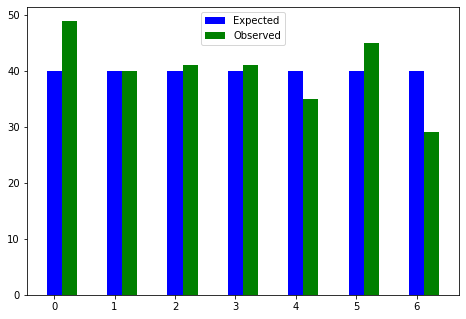

In [13]:
# graphs of expected value and observed value

table_1 = [mon,tue,wed,thu,fri,sat,sun]
print(expected2)
print(ls_score)
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expected2, color = 'b', width = 0.25)
ax.bar(X + 0.25, ls_score, color = 'g', width = 0.25)
ax.legend(labels=['Expected', 'Observed'])



From the graph, we can see there is no large difference between tuesday and Saturday. However, Sunday and Monday differs a lot. 

['Mon', 3, 19, 15]


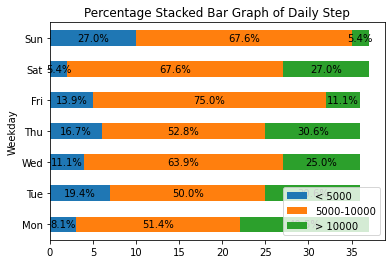

In [149]:
products_list = [mon_ls,tue_ls,wed_ls,thu_ls,fri_ls,sat_ls,sun_ls]
df = pd.DataFrame (products_list, columns = ['Weekday', '< 5000',"5000-10000","> 10000"])
df.plot(
  x = 'Weekday', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph of Daily Step', 
  mark_right = True,
  legend = True)
  
df_total = df["< 5000"] + df["5000-10000"] + df["> 10000"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

This graph shows percentage of different step range on each weekday. We can see Saturday has the least day of being inactive, whereas Sunday has the most. Also, the paticipant has 40% in Monday which keeps more than 10k steps but only get 5% in Sunday.

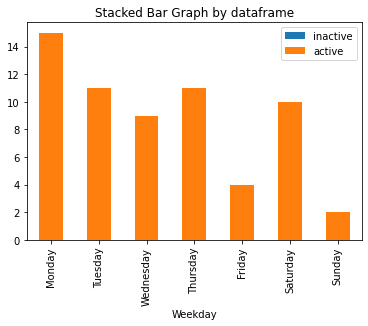

In [153]:
# mon_act = [mon_inactive,mon_large]
# tue_act = [tue_inactive,tue_large]
# wed_act = [wed_inactive,wed_large]
# thu_act = [thu_inactive, thu_large]
# fri_act = [fri_inactive,fri_large]
# sat_act = [sat_inactive,sat_large]
# sun_act = [sun_inactive,sun_large]
act_list = [mon_act,tue_act,wed_act,thu_act,fri_act,sat_act,sun_act]
df = pd.DataFrame (act_list, columns = ['Weekday','inactive', 'active'])
 
# plot data in stack manner of bar type
df.plot(x='Weekday', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')
plt.show()

